In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
import math
from tsmom_model import *
import numpy as np
from datetime import datetime
import statsmodels.formula.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
sns.set(font_scale=3)
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


# Hand cleansed
Hand cleaned to removed duplicates

In [2]:
cleansed=load_amihud_markets_price()

tsmom_model.py:146: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  data=pd.read_csv('Price.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')
tsmom_model.py:148: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  qd=pd.read_csv('liquid_contracts.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='last')


In [3]:
cleansed.count().count()

123

# Amihud methodology

Amihud (2002) developed the illiquidity measure expressed by:

$$ Amihud = \frac{|r_t|}{\text{volume}_t} $$

where $r_t$ is the return on day $t$ and $Volume_t$ is the dollar volume on day $t$. 

The benefit of taking the daily return is to weight the move by change of price and the volume.


In [4]:
amihud=calculate_amihud_liquidity(cleansed)[:'2016'] 

tsmom_model.py:29: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  data=pd.read_csv('Volume.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='mean')
tsmom_model.py:31: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).sum()
  v=pd.read_csv('volume_data.csv',index_col=0,parse_dates=['Date']).resample(rule='d',how='sum')
tsmom_model.py:33: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=100,window=250,center=False).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:33: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  volume=pd.rolling_mean(v,250,min_periods=100).resample(rule='d',how='mean')[:'2016']
tsmom_model.py:36: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future versio

In [98]:
df=pd.DataFrame()
mp =load_maps()
for sect in mp.Sector.unique():
    ind=mp[mp.Sector==sect].index
    new_ind=[]
    for i in ind:
        if i in amihud.columns:
            new_ind.append(i)
    df[sect]=amihud[new_ind].median(axis=1)

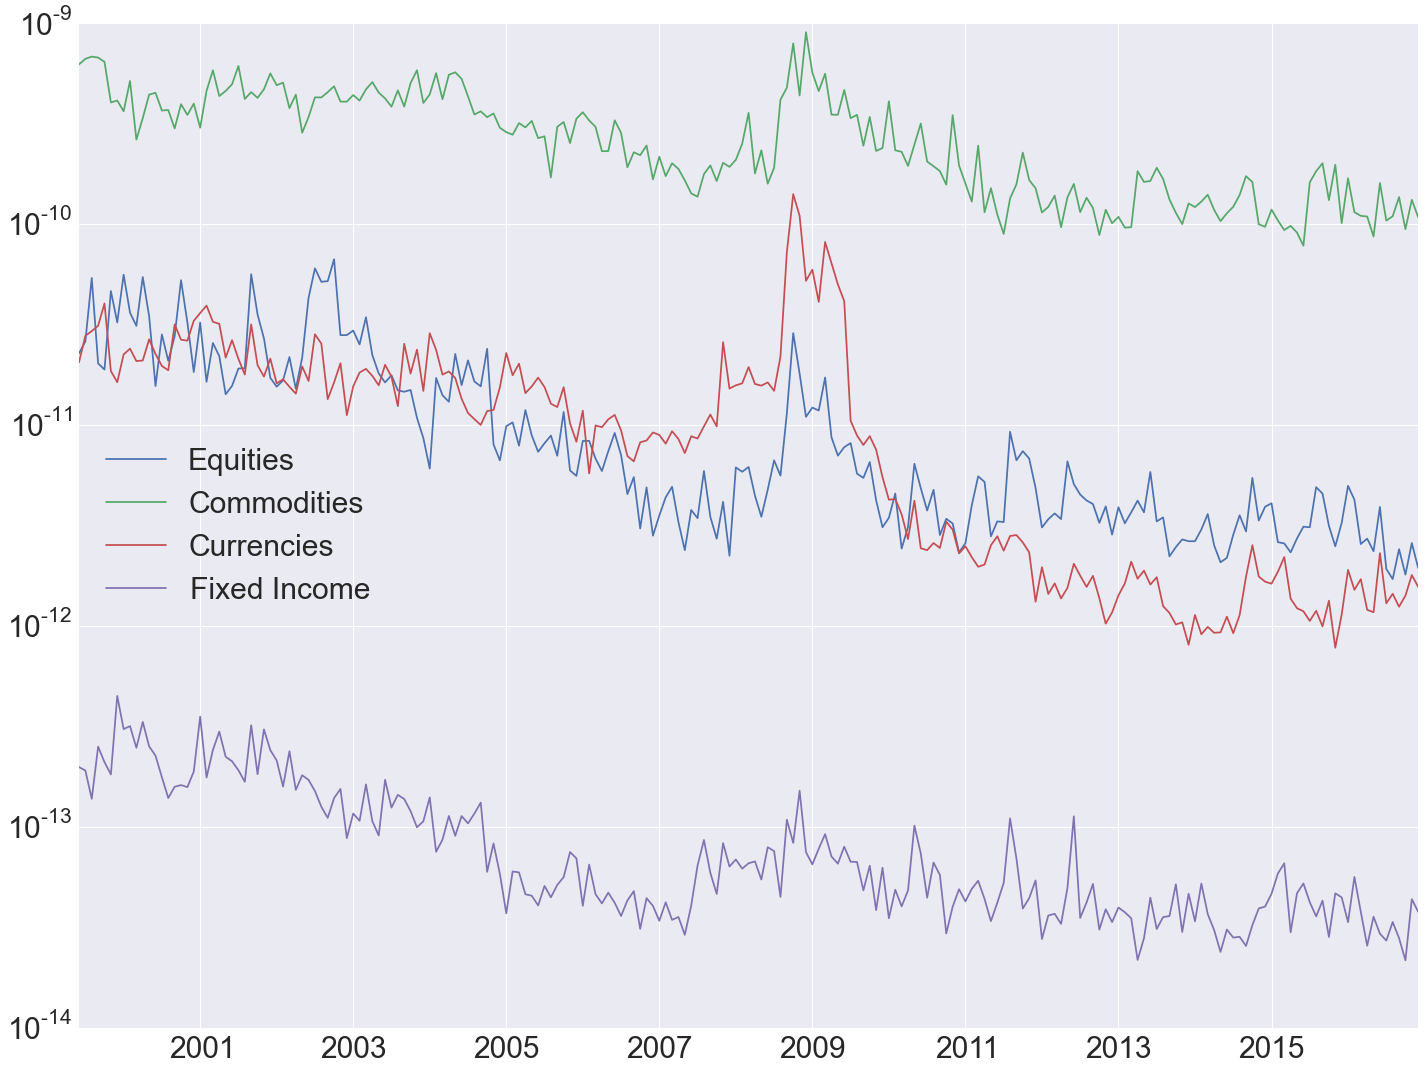

In [99]:
df.dropna().plot(logy=True)

In [100]:
s = pd.Series()
for sect in mp.Sector.unique():
    s[sect]= mp[mp.Sector==sect].Sector.count()

In [109]:
res=pd.DataFrame()
res['Mean']=df.mean()*1e13
res['Standard Deviation']=df.std()*1e13
res['Number of Markets']=s

In [111]:
print res.round(2).to_latex()

\begin{tabular}{lrrr}
\toprule
{} &     Mean &  Standard Deviation &  Number of Markets \\
\midrule
Equities     &   118.48 &              130.71 &                 29 \\
Commodities  &  2858.82 &             1620.98 &                 76 \\
Currencies   &   137.15 &              172.95 &                  8 \\
Fixed Income &     0.89 &                0.75 &                 32 \\
\bottomrule
\end{tabular}

